# Training and Testing Data
To evaluate how well our supervised models generalize, we can **split** our data into a training and a test set:

<img src="figures/train_test_split.svg" width="100%">


The **test data** is a **simulation** of "**future data**" which will come into the system during production. 

#### Shuffle before splitting
For iris, the labels in iris are sorted, which means that if we split the data using a proportional split, we will get all of specific labels (0 and 1) and very little of another (2). 

We want to split as illustrated above, but *after* the data has been **randomly shuffled**.

In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To get an accurate simulation of the real world, we will **shuffle** our data **then split**.

In [6]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


Now we need to ``split`` the data into **training** and **testing**. <br>
Luckily, this is a common pattern in machine learning and scikit-learn has a prebuilt function to split data into training and testing for you. <br>
Here we use 50% of the data as training, and 50% testing. <br>
80% and 20% is another common split, but there are no hard and fast rules. <br>

In [7]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=1999)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[0 1 1 2 2 2 0 2 2 1 1 2 2 1 1 1 1 1 0 2 2 2 1 0 2 1 1 2 1 0 2 2 0 2 2 0 2
 1 0 2 0 2 2 2 0 2 0 0 1 0 1 0 2 1 1 0 1 2 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 2]
[1 0 1 2 2 1 1 0 1 0 0 2 2 2 1 0 2 0 2 1 0 0 0 2 1 1 1 1 1 0 2 2 2 2 0 1 0
 1 2 1 2 2 1 2 2 1 0 2 0 2 1 2 0 0 2 0 2 1 2 1 0 1 0 1 0 2 2 0 0 0 1 0 1 0
 1]


#### Never use test set for training!
The most important thing is to fairly **evaluate** your system on data it **has not seen during training**!

By evaluating our classifier performance on data that has been seen during training, we could get **false confidence** in the power of our system. 

This might lead to putting a system into production which *fails* at predicting new data!   
It is much better to use a train/test split in order to properly see how your trained model is doing on new data.

In [8]:
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print("Fraction Correct")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct
0.96


#### Visualization
We can also **visualize** the **correct** and **failed** predictions

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
correct_idx = np.where(pred_y == test_y)[0]
print("correct", correct_idx)

incorrect_idx = np.where(pred_y != test_y)[0]
print("incorrect", incorrect_idx)

correct [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73 74]
incorrect [24 38 72]


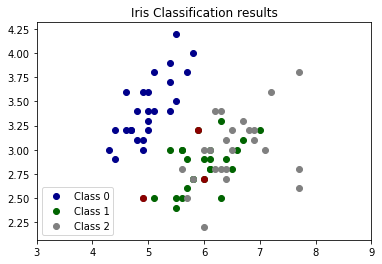

In [10]:
# Plot two dimensions
colors = ["darkblue", "darkgreen", "gray"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 0], test_X[idx, 1], color=color, label="Class %s" % str(n))
    
plt.scatter(test_X[incorrect_idx, 0], test_X[incorrect_idx, 1], color="darkred")

# Make xlim larger to accommodate legend
plt.xlim(3, 9)
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

We can see that the **errors occur in the area where green** (class 1) **and gray** (class 2) **overlap**. 

This gives us insight about what **features to add** - any feature which helps separate class 1 and class 2 should improve classifier performance.

##  Split a dataset in Train and Test using Numpy

If we want to split the Iris dataset in two subset, we can use ``numpy.random.permutation`` because we need to **keep track of the indices**:

In [11]:
import numpy
from random import shuffle

# We can use NumPy's array indexing:
assert len(X) == len(y)
p = numpy.random.permutation(len(X))
# print("indices:",p)

# This will result in creation of separate unison-shuffled arrays.
X1 = X[p] 
y1 = y[p]
# print("y: ",y)
# print("y1:",y1)

# Here is a way to split the data into two sets: 80% train, 20% test.
split = int(0.8 * len(X))
train_X = X1[:split]
train_y = y1[:split]

test_X = X1[split:]
test_y = y1[split:]
print("Train_y:", train_y)
print("Test_y:", test_y)

Train_y: [0 1 2 0 0 2 2 2 2 2 2 2 2 0 1 2 2 1 2 0 2 2 1 1 2 0 0 2 0 2 1 2 2 1 0 1 2
 0 1 1 0 0 0 1 2 1 1 0 0 1 0 2 2 2 1 0 1 1 1 1 2 0 0 2 0 1 2 2 1 2 1 1 0 1
 0 0 2 1 0 0 1 0 0 2 0 1 0 2 1 1 2 1 1 0 2 0 0 1 2 0 2 0 0 2 1 0 0 2 1 0 0
 2 2 2 0 2 0 1 1 0]
Test_y: [2 1 2 0 0 1 1 0 1 1 1 2 2 1 0 1 1 1 0 2 2 2 0 0 1 1 1 1 2 0]


# Using k-fold cross-validation to assess model performance

source: [python-machine-learning-book](https://github.com/rasbt/python-machine-learning-book)

One of the key steps in building a machine learning model is to ``estimate its performance on data that the model hasn't seen before``.<br>
A model can either suffer from **underfitting** if the model is too simple, or it can **overfit** training data  if the model is too complex for the underlying training data. <br>
To find an acceptable trade-off, we need to evaluate our model carefully. 

In this section, you will learn about the useful ``cross-validation techniques`` 
* **holdout cross-validation** and 
* **k-fold cross-validation**, 

which can help us to obtain reliable estimates of the model's generalization error, that is, ``how well the model performs on unseen data``.

## The holdout method

A classic and popular approach for ``estimating the generalization performance`` of machine learning models is **holdout cross-validation**. <br>
We split our initial dataset into  
* **training** dataset: used for model training 
* **test** dataset: used to estimate the model performance. 


#### model selection: tuning hyperparameters

However, in typical machine learning applications, we are also interested in  
``tuning and comparing different parameter settings``   
to further improve the performance for making predictions on unseen data. 

This process is called **model selection**, where the term model selection refers to a given classification problem for which we want to select the optimal values of **tuning parameters** (also called **hyperparameters**).

However, if we ``reuse the same test dataset`` over and over again during model
selection, it will become part of our training data and thus the model will be more
likely to **overfit**. <br>
Despite this issue, many people still ``use the test set for model selection``, which ``is not a good machine learning practice``.

A better way of using the holdout method for model selection is to separate the data
into three parts: <br>
* a **training set**, used to fit the different models
* a **validation set**, used for the model selection 
* a **test set**., that the model hasn't seen before during the training and model selection steps


<img src="./figures/06_02.png" width="50%">

How could we split randomly a data set and the corresponding label vector into a ``X_train``, ``X_test``, ``X_val``, ``y_train``, ``y_test``, ``y_val`` with Sklearn?

In [ ]:
# We can use sklearn.model_selection.train_test_split twice. 
# First to split to train, test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# and then split train again into validation and train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print("Labels for training, validation and testing data")
print("TRAIN:",y_train)
print("TEST:",y_test)
print("VAL:",y_val)

## K-fold cross-validation

In $k$-fold cross-validation, we ``randomly split`` the training dataset into $k$ folds ``without replacement``, where $k − 1$ folds are used for the model **training** and one fold is used for **testing**. <br>
This procedure is repeated $k$ times so that we obtain $k$ models and performance estimates.

<img src="./figures/06_03.png" width="70%">


In [12]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=False)  
classifier = KNeighborsClassifier()
scores = []
for k, (train_index, test_index) in enumerate(skf.split(X, y)):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier.fit(X_train, y_train)
    pred_y = classifier.predict(X_test)
    score = np.sum(pred_y == y_test) / float(len(y_test))
    scores.append(score)
    print('Fold: %s, Acc: %.3f' % (k, score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


TRAIN: [ 12  13  14  16  17  19  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 15 18 20]
Fold: 0, Acc: 1.000
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  15  18  20  21  27  28
  29  31  32  35  36  37  38  39  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104